<a href="https://colab.research.google.com/github/Manyambhavitha/csce-5218/blob/main/HW2_The_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [59]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2024-02-18 22:32:38--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat.3’

test.dat.3          100%[===================>]   2.78K  --.-KB/s    in 0s      

2024-02-18 22:32:39 (294 MB/s) - ‘test.dat.3’ saved [2844/2844]

--2024-02-18 22:32:39--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat.3’

train.dat.3         100%[===================>]  10.98K  --.-KB/s    in 0s      

2024-02-18 22:32:39 (192 MB/s) - ‘train.dat.3’ saved [11244/11244]



In [60]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [61]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    # Return dot product of array 1 and array 2
    return sum(x * y for x, y in zip(array1, array2))


def sigmoid(x):
    # Return output of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    # Return the output of the model
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    # Return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    # Initialize weights
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # Compute the dot product
            in_value = dot_product(weights, instance)
            # Compute the output of the model
            output_val = sigmoid(in_value)
            # Compute the error
            error = instance[-1] - output_val
            # Update weights
            for i in range(0, len(weights)):
                weights[i] += lr * error * output_val * (1-output_val) * instance[i]

    return weights

## Run it

In [62]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




The reason we don't use predict(weights, instance) to calculate the results within the training loop is efficiency.

Computational efficiency is a critical aspect of machine learning model training, particularly when dealing with large data sets or complex models. Predict(weights, instances) and the use of dot product calculation in the training loop would require separate computations for the dotting product and sigmoid function.

Optimize the training process by using the sigmoid function in conjunction with the dot product calculation and applying it to the loop, eliminating unnecessary calculations.
During training, this may result in faster convergence and lower computational overhead.

Along with the importance of code clarity and readability, there is also the matter of maximizing computational efficiency when developing and executing machine learning algorithms.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [63]:
train_data = read_data("train.dat")
test_data = read_data("test.dat")
for data_percentage in [5, 10, 25, 50, 75, 100]:
    for epochs_count in [5, 10, 20, 50, 100]:
        for lr in [0.005, 0.01, 0.05]:
            data_size = int(len(train_data) * data_percentage / 100)
            subset = train_data[:data_size]
            model_weights = train_perceptron(subset, lr, epochs_count)
            test_accuracy = get_accuracy(model_weights, test_data)
            print(f"Data Percentage: {data_percentage:3d}%, Epochs: {epochs_count:3d}, Learning Rate: {lr:.3f}; Test Accuracy (on {len(test_data)} instances): {test_accuracy:.2f}")

Data Percentage:   5%, Epochs:   5, Learning Rate: 0.005; Test Accuracy (on 100 instances): 68.00
Data Percentage:   5%, Epochs:   5, Learning Rate: 0.010; Test Accuracy (on 100 instances): 68.00
Data Percentage:   5%, Epochs:   5, Learning Rate: 0.050; Test Accuracy (on 100 instances): 68.00
Data Percentage:   5%, Epochs:  10, Learning Rate: 0.005; Test Accuracy (on 100 instances): 68.00
Data Percentage:   5%, Epochs:  10, Learning Rate: 0.010; Test Accuracy (on 100 instances): 68.00
Data Percentage:   5%, Epochs:  10, Learning Rate: 0.050; Test Accuracy (on 100 instances): 68.00
Data Percentage:   5%, Epochs:  20, Learning Rate: 0.005; Test Accuracy (on 100 instances): 68.00
Data Percentage:   5%, Epochs:  20, Learning Rate: 0.010; Test Accuracy (on 100 instances): 68.00
Data Percentage:   5%, Epochs:  20, Learning Rate: 0.050; Test Accuracy (on 100 instances): 68.00
Data Percentage:   5%, Epochs:  50, Learning Rate: 0.005; Test Accuracy (on 100 instances): 68.00
Data Percentage:   5

In [64]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 100

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



A.The training data set's effectiveness with the test dataset is contingent on various factors such as the size and quality of the data collection, the problem' complexities, and the calculation required to achieve optimal accuracy, effectiveness of  learning algorithms.
The use of larger data sets during training can result in improved generalization and increased accuracy.
Increasing the training data set may not result in substantial performance improvement, leading to diminishing returns.The size of the training data set must be chosen with sufficient computational resources to ensure the expected level of accuracy.

B.Even with more training data, the second run's accuracy was not as high, which could be attributed to different factors.It is possible that the increased training data results in more noise or outliers, which could lead to a decline in model performance.Additional data quality can be a contributing factor to model learning, as it may not be indicative or useful.
Despite the presence of training data, model performance can be affected by hyperparameters like learning rate and number of epochs. However, only specific ones are relevant

C.Achieving  accuracy above 80.0 depends on the complexity of the problem as well as the effectiveness of the  model and hyperparameters chosen.
Higher accuracy may be attained by tuning hyperparameters or employing more sophisticated models in certain situations.
However, it is not always possible to achieve extremely high accuracy, especially for complex or noisy datasets.Setting realistic expectations and prioritizing models that can generalize well to unobserved data is crucial, rather than pursuing highly precise figures.

D.The model's performance can be enhanced by increasing the number of epochs, which allows for greater learning from training data.
If the model begins to learn common patterns rather than memorizing training data, it may overfit.
Model performance on the validation dataset should be monitored and training terminated if performance degradation occurs.
Additionally, limitations in computational resources and time  may limit the feasibility of training for a large number of epochs.
Hence, it is important to balance the demands of training time and computational resources with the ones that work well with models.


# tr:   5, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:  10, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:  10, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:  10, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:  10, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:  10, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:  25, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:  25, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances)

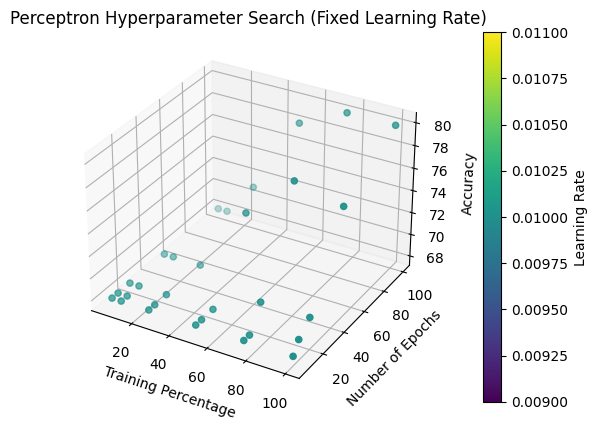

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
instances_train = ...
instances_test = ...
training_percent_list = []
n_epochs_list = []
learn_rate_list = []
accuracy_list = []
fixed_learning_rate = 0.01

for training_percent in [5, 10, 25, 50, 75, 100]:
    for num_epochs in [5, 10, 20, 50, 100]:
        learning_rate = fixed_learning_rate
        tr_data_size = int(len(instances_tr) * training_percent / 100)
        tr_subset = instances_tr[:tr_data_size]
        weights = train_perceptron(tr_subset, learning_rate, num_epochs)
        accuracy = get_accuracy(weights, instances_te)
        training_percent_list.append(training_percent)
        n_epochs_list.append(num_epochs)
        learn_rate_list.append(learning_rate)
        accuracy_list.append(accuracy)
        print(f"# tr: {training_percent:3d}, epochs: {num_epochs:3d}, learning rate: {learning_rate:.3f}; Accuracy (test, {len(instances_te)} instances): {accuracy:.2f}")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(training_percent_list, n_epochs_list, accuracy_list, c=learn_rate_list, cmap='viridis', marker='o')

ax.set_xlabel('Training Percentage')
ax.set_ylabel('Number of Epochs')
ax.set_zlabel('Accuracy')
ax.set_title('Perceptron Hyperparameter Search (Fixed Learning Rate)')
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Learning Rate')
plt.show()